In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [8]:
file_path = r"D:\school\NCKU\Courses\Data Mining & Big Data\Assignment\Final Report\simple_accepted.csv"
loans = pd.read_csv(file_path)
# loans = pd.read_csv("accepted_2007_to_2018Q4.csv.gz", compression='gzip', low_memory=True)
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,132555889,NaN,11000.0,11000.0,11000.0,36 months,10.90,359.61,B,B4,Heavy Equipment Operator,8 years,RENT,36000.0,Source Verified,May-2018,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=132555889,NaN,credit_card,Credit card refinancing,169xx,PA,16.10,0.0,Apr-2008,675.0,679.0,2.0,NaN,NaN,22.0,0.0,15093.0,40.1,24.0,w,8294.29,8294.29,3613.580000,3613.58,2705.71,907.87,0.0,0.0,0.0,Mar-2019,359.61,Apr-2019,Mar-2019,669.0,665.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,15093.0,3.0,0.0,0.0,0.0,NaN,0.0,NaN,3.0,8.0,2331.0,40.0,37600.0,0.0,0.0,2.0,8.0,686.0,13699.0,47.9,0.0,0.0,NaN,120.0,2.0,2.0,0.0,4.0,NaN,1.0,NaN,0.0,12.0,14.0,13.0,14.0,0.0,22.0,24.0,14.0,22.0,0.0,0.0,0.0,3.0,100.0,38.5,0.0,0.0,37600.0,15093.0,26300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
1,69743499,NaN,12000.0,12000.0,12000.0,36 months,6.99,370.48,A,A3,RN,9 years,MORTGAGE,86000.0,Not Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=69743499,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.84,0.0,Apr-2000,685.0,689.0,1.0,35.0,NaN,19.0,0.0,10032.0,30.0,38.0,w,0.00,0.00,13334.562695,13334.56,12000.00,1334.56,0.0,0.0,0.0,Jan-2019,370.09,NaN,Mar-2019,674.0,670.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,234402.0,1.0,4.0,1.0,1.0,5.0,22333.0,61.0,0.0,2.0,1772.0,30.0,33005.0,0.0,0.0,2.0,3.0,12336.0,2202.0,41.0,0.0,0.0,153.0,189.0,19.0,5.0,1.0,32.0,36.0,2.0,35.0,0.0,3.0,14.0,9.0,10.0,11.0,14.0,26.0,12.0,19.0,NaN,0.0,0.0,1.0,9

In [9]:
loans.shape

(339105, 151)

In [10]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid                                             161257
Current                                                131868
Charged Off                                             40415
Late (31-120 days)                                       3203
In Grace Period                                          1292
Late (16-30 days)                                         620
Does not meet the credit policy. Status:Fully Paid        334
Does not meet the credit policy. Status:Charged Off       107
NaN                                                         7
Default                                                     2
Name: loan_status, dtype: int64

In [11]:
# keep the loans with status "Fully Paid" or "Charged Off."
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [12]:
loans.shape

(201672, 151)

In [13]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     161257
Charged Off     40415
Name: loan_status, dtype: int64

In [14]:
loans['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.7996
Charged Off    0.2004
Name: loan_status, dtype: float64

In [15]:
loans.isnull().sum().sort_values(ascending=False).head(100)

next_pymnt_d                                  201672
member_id                                     201672
orig_projected_additional_accrued_interest    201122
hardship_start_date                           200784
hardship_length                               200784
hardship_type                                 200784
hardship_reason                               200784
hardship_status                               200784
deferral_term                                 200784
hardship_amount                               200784
hardship_end_date                             200784
payment_plan_start_date                       200784
hardship_dpd                                  200784
hardship_loan_status                          200784
hardship_payoff_balance_amount                200784
hardship_last_payment_amount                  200784
sec_app_mths_since_last_major_derog           200720
sec_app_revol_util                            198875
sec_app_collections_12_mths_ex_med            

In [16]:
cols_to_drop = loans.isnull().sum().sort_values(ascending=False).head(95).index
loans = loans.drop(columns=cols_to_drop)
loans.shape

(201672, 56)

In [17]:
nulls = loans.isnull().sum().sort_values(ascending=False)
nulls_percentage = (nulls/loans.shape[0]*100)
nulls_percentage.head(15)

last_pymnt_d                  0.167103
pub_rec_bankruptcies          0.069420
revol_util                    0.064957
dti                           0.027768
chargeoff_within_12_mths      0.004959
collections_12_mths_ex_med    0.004959
last_credit_pull_d            0.003471
tax_liens                     0.003471
delinq_amnt                   0.000000
recoveries                    0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
dtype: float64

In [18]:
loans = loans.dropna()
loans.shape

(201004, 56)

In [19]:
#remove cloumns
cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code', 'id', 'pymnt_plan', 'hardship_flag', 'issue_d', 'url', 'last_pymnt_d', 
                'last_credit_pull_d', 'zip_code', 'addr_state', 'earliest_cr_line']
loans = loans.drop(columns=cols_to_drop)
loans.shape

(201004, 43)

In [20]:
#remove duplicated information.
cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 
                'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
loans = loans.drop(columns=cols_to_drop)
loans.shape

(201004, 34)

In [21]:
loans['term'].value_counts(dropna=False)

 36 months    152402
 60 months     48602
Name: term, dtype: int64

In [22]:
loans['term'] = loans['term'].apply(lambda s: np.int8(s.split()[0]))
loans['term'].value_counts(normalize=True)

36    0.758204
60    0.241796
Name: term, dtype: float64

In [23]:
loans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.158364
60    0.326571
Name: loan_status, dtype: float64

In [24]:
print(sorted(loans['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [25]:
loans.drop('grade', axis=1, inplace=True)

In [26]:
loans = pd.get_dummies(loans, columns = ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 
                                       'initial_list_status', 'application_type', 'disbursement_method', 'debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)

In [27]:
loans.shape

(201004, 83)

In [28]:
#  0 indicates fully paid and 1 indicates charge-off
loans['charged_off'] = (loans['loan_status'] == 'Charged Off').apply(np.uint8)
loans.drop('loan_status', axis=1, inplace=True)

In [29]:
X, y = loans.drop('charged_off', axis=1), loans['charged_off']
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index],
    y_train, y_test = y.iloc[train_index], y.iloc[test_index],

In [30]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [36]:
from xgboost.sklearn import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

[10:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 99.45%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.995257      0.991216  0.994461       0.993237       0.994453
recall          0.997840      0.980866  0.994461       0.989353       0.994461
f1-score        0.996547      0.986014  0.994461       0.991280       0.994450
support    144894.000000  36010.000000  0.994461  180904.000000  180904.000000
_______________________________________________
Confusion Matrix: 
 [[144581    313]
 [   689  35321]]

Test Result:
Accuracy Score: 98.70%
_______________________________________________

In [37]:
from sklearn.metrics import roc_curve,auc

y_score = xgb_clf.predict_proba(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_test_pred)
roc_auc_gb = auc(fpr_gb, tpr_gb)
print(roc_auc_gb)

0.976378708610729


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_booster = GradientBoostingClassifier(max_depth=7, n_estimators=200, random_state=42,learning_rate=0.1)
gradient_booster.get_params()
gradient_booster.fit(X_train,y_train)
y_train_pred = gradient_booster.predict(X_train)
y_test_pred = gradient_booster.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.51%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.995588      0.993065  0.995091       0.994326       0.995086
recall          0.998295      0.982199  0.995091       0.990247       0.995091
f1-score        0.996940      0.987602  0.995091       0.992271       0.995081
support    144894.000000  36010.000000  0.995091  180904.000000  180904.000000
_______________________________________________
Confusion Matrix: 
 [[144647    247]
 [   641  35369]]

Test Result:
Accuracy Score: 98.68%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.990037     0.973357  0.986766      0.981697      0.986720
recall         0.993479     0.959720  0.986766      0.976600      0.986766
f1-score       0.991755     0.966490  0.986766      0.979123 

In [35]:
# from sklearn.metrics import roc_curve,auc

y_score = gradient_booster.predict_proba(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_test_pred)
roc_auc_gb = auc(fpr_gb, tpr_gb)
print(roc_auc_gb)

0.9765996328582213


Text(0.5, 0, 'feature importance')

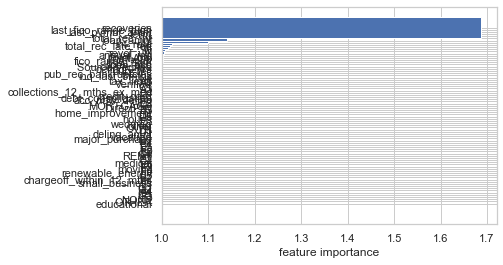

In [49]:
sort = gradient_booster.feature_importances_.argsort()
plt.barh(loans.columns.to_numpy()[sort], gradient_booster.feature_importances_[sort], height=0.8, left=1)
plt.xlabel("feature importance")

In [50]:
sort

array([67, 60, 59, 50, 57, 53, 26, 54, 55, 48, 75, 20, 29, 37, 74, 51, 72,
       49, 46, 71, 34, 24, 62, 56, 32, 52, 47, 28, 43, 39, 70, 76, 21, 38,
       40, 61, 73, 77, 45, 69, 42, 41, 68, 30, 80, 58, 35, 44, 19, 66, 65,
       31, 18, 25, 33, 64, 27, 23, 36,  7, 22,  9,  5, 63,  8, 12,  6, 79,
       10,  3, 11, 78,  4, 14,  2, 81,  0, 13,  1, 16, 17, 15],
      dtype=int64)

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 6)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
predict = model.predict(X_test)
#print(predict)
accuracy = accuracy_score(predict, y_test)
print("accuracy:", accuracy)
score = classification_report(y_test, predict)
print(score)


accuracy: 0.9550248756218905
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     16103
           1       1.00      0.78      0.87      3997

    accuracy                           0.96     20100
   macro avg       0.97      0.89      0.92     20100
weighted avg       0.96      0.96      0.95     20100



In [51]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

# X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)

print(loans['Y'].value_counts())
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))

0    196120
1      4884
Name: Y, dtype: int64
number of correct sample: 19500
accuracy: 0.9701492537313433


In [52]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)


print("Mean squared error: {}".format(mse))
print('r2 score: {}'.format(r2))
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('confusion matrix: {}'.format(con_matrix))

Mean squared error: 0.029850746268656716
r2 score: 0.8126272776991611
number of correct sample: 19500
accuracy: 0.9701492537313433
confusion matrix: [[15885   218]
 [  382  3615]]


In [44]:
from sklearn import preprocessing
from sklearn.linear_model  import LogisticRegression
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model=LogisticRegression()
model.fit(X_train,y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)

print(loans['Y'].value_counts())
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))

C:\Users\charl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0    196120
1      4884
Name: Y, dtype: int64
number of correct sample: 19488
accuracy: 0.9695522388059702


In [46]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)


print("Mean squared error: {}".format(mse))
print('r2 score: {}'.format(r2))
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('confusion matrix: {}'.format(con_matrix))

Mean squared error: 0.03044776119402985
r2 score: 0.8088798232531443
number of correct sample: 19488
accuracy: 0.9695522388059702
confusion matrix: [[15875   228]
 [  384  3613]]
